# Improving a model with Grid Search
In this notebook, I will fit data on decision tree model. Initially, model will overfit heavily because of default hyperparameters. Then we'll use Grid Search to find better hyperparameters for this model, to reduce the overfitting.

### Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### reading and plotting the data

/home/rajat/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


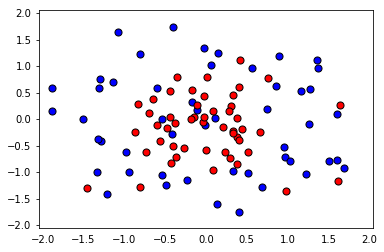

In [2]:
def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header=None))
    X = data[:,0:2]
    y = data[:,2]

    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    return X,y

X, y = load_pts('data.csv')
plt.show()

### Splitting the data into training and testing sets

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting a Decision Tree model

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
preds1 = clf.predict(X_train)
print(f1_score(preds, y_test))

0.7000000000000001


### Function for plotting model

In [5]:
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(), 0], X[np.argwhere(y==0).flatten(), 1], s = 50, color = "blue", edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(), 0], X[np.argwhere(y==1).flatten(), 1], s = 50, color = "red", edgecolor = 'k')
    
    plt.xlim(-2.05, 2.05)
    plt.ylim(-2.05, 2.05)
    plt.grid(False)
    plt.tick_params(axis='x', which='both', bottom='off', top='off')
    
    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s, (np.size(s),1))
    t = np.reshape(t, (np.size(t),1))
    h = np.concatenate((s,t), 1)
    
    z = clf.predict(h)
    
    s = s.reshape((np.size(r), np.size(r)))
    t = t.reshape((np.size(r), np.size(r)))
    z = z.reshape((np.size(r), np.size(r)))
    
    plt.contourf(s,t,z,colors = ['blue', 'red'], alpha = 0.2, levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

/home/rajat/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


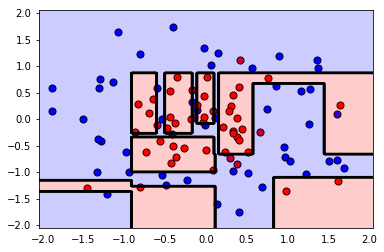

training:  1.0
testing:  0.7000000000000001


In [6]:
plot_model(X, y, clf)
print("training: ", f1_score(preds1, y_train))
print("testing: ", f1_score(preds, y_test))

so, there is some overfitting happening as you can see the model is perfectly fitted on the training data

### Using Grid Search to improve the model

   * First define some parameters to perform grid search on. We suggest to play with max_depth, min_samples_leaf, and min_samples_split.
   * Make a scorer for the model using f1_score.
   * Perform grid search on the classifier, using the parameters and the scorer.
   * Fit the data to the new classifier.
   * Plot the model and find the f1_score.
   * If the model is not much better, try changing the ranges for the parameters and fit it again.


training  0.8148148148148148
testing  0.8


/home/rajat/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


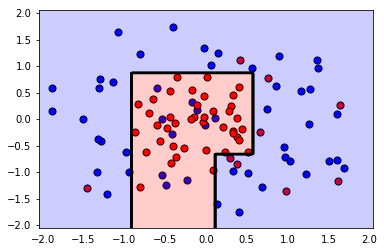

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [7]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf_1 = DecisionTreeClassifier()

parameters = {'max_depth': [2,4,6,8,10], 'min_samples_split': [2,4,6,8,10], 'min_samples_leaf': [2,4,6,8,10]}
scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(clf_1, parameters, scorer)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_
best_clf.fit(X_train, y_train)

train_preds = best_clf.predict(X_train)
test_preds = best_clf.predict(X_test)

print("training ", f1_score(train_preds, y_train))
print("testing ", f1_score(test_preds, y_test))

plot_model(X,y, best_clf)
print(best_clf)
